# Group Members

PLACXEDECE K PHIRI                                R204482L

ANOTIDA E MSIIWA 			                      R217113X

GILLIAN JAMES				                      R217096Y

WAKATENDEKA MHLANGA                               R219540L

RAPHAEL T CHITSVA			                      R056165Y

TINASHE JIMA				                      R217094J

LAZARUS MAPFURIRA			                      R217116X

WALTER CHIPURIRO 			                      R217118K

BREDON MOYO	                                      R204596G

TAFARA A MUKWANI 			                      R217091Z



In [1]:
#import all libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
dataframe=pd.read_csv('HepatitisCdata.csv', index_col=0)
dataframe


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
df=dataframe.copy()

# Exploratory data analysis
Getting to know the data

Data Processing (Missing values)

Cross Tables and data visualisation


# Getting to know the data

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [5]:
#Handling missing values

In [6]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [7]:
df.describe()  # Dispalying numerical data

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [8]:
df.describe(include='O') # Printing categorical variables ie non-numerical variables

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [9]:
df=df.dropna(how='any')

In [10]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [11]:
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [12]:
#Frequency of each category in the dataset

In [13]:
df['Category'].value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [14]:
#showing rows with patients with Hepatitis
df.loc[df['Category']=='1=Hepatitis']

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
543,1=Hepatitis,23,m,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1
544,1=Hepatitis,25,m,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5
545,1=Hepatitis,27,m,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5
548,1=Hepatitis,32,m,45.0,34.6,44.3,96.2,16.0,10.11,6.28,81.2,48.1,82.1
549,1=Hepatitis,32,m,41.0,34.4,12.1,60.9,6.0,13.80,5.48,45.4,33.1,71.1
550,1=Hepatitis,34,m,46.0,36.7,7.4,31.6,9.0,9.71,5.37,82.3,34.4,71.6
551,1=Hepatitis,35,m,47.0,37.9,13.3,48.4,8.0,10.30,4.14,69.2,68.2,76.0
552,1=Hepatitis,36,m,44.0,32.9,9.4,32.0,14.0,11.42,5.73,68.6,40.6,70.9
553,1=Hepatitis,38,m,41.0,20.6,15.2,53.5,24.0,10.23,4.89,81.8,57.9,71.1
554,1=Hepatitis,41,m,42.0,39.6,26.5,77.6,42.0,9.67,9.67,57.7,143.4,75.8


In [15]:
#showing rows with people who are blood donors
df.loc[df['Category']=='0=Blood Donor']

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0=Blood Donor,64,f,39.8,68.1,20.5,24.8,5.8,7.53,7.58,56.0,14.2,65.8
530,0=Blood Donor,64,f,43.0,52.7,31.6,29.2,5.5,11.69,6.00,63.0,61.9,73.4
531,0=Blood Donor,65,f,33.0,74.3,13.2,16.8,4.1,7.46,5.76,52.0,9.1,64.2
532,0=Blood Donor,68,f,41.4,102.3,38.4,26.4,6.8,8.50,6.79,59.0,23.8,68.9


In [16]:
print(np.unique(df['Category'])) #Checking for unique functions

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [17]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [18]:
#relationship between variables
corr=df.corr()
corr

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.191094,0.177720,-0.040576,0.072739,0.039655,-0.075863,0.124742,-0.025142,0.143379,-0.159760
ALB,-0.191094,1.000000,-0.146120,0.039497,-0.177609,-0.169597,0.360919,0.210420,0.001433,-0.147598,0.570726
ALP,0.177720,-0.146120,1.000000,0.221603,0.067024,0.058372,0.029482,0.125900,0.153909,0.461300,-0.063085
ALT,-0.040576,0.039497,0.221603,1.000000,0.198658,-0.106797,0.224344,0.149997,-0.036106,0.219707,0.016786
AST,0.072739,-0.177609,0.067024,0.198658,1.000000,0.309580,-0.197270,-0.201213,-0.017948,0.477774,0.017404
BIL,0.039655,-0.169597,0.058372,-0.106797,0.309580,1.000000,-0.320713,-0.181570,0.019910,0.210567,-0.052575
CHE,-0.075863,0.360919,0.029482,0.224344,-0.197270,-0.320713,1.000000,0.428018,-0.012120,-0.095716,0.306288
CHOL,0.124742,0.210420,0.125900,0.149997,-0.201213,-0.181570,0.428018,1.000000,-0.051464,0.008823,0.245050
CREA,-0.025142,0.001433,0.153909,-0.036106,-0.017948,0.019910,-0.012120,-0.051464,1.000000,0.125353,-0.030111
GGT,0.143379,-0.147598,0.461300,0.219707,0.477774,0.210567,-0.095716,0.008823,0.125353,1.000000,-0.037127


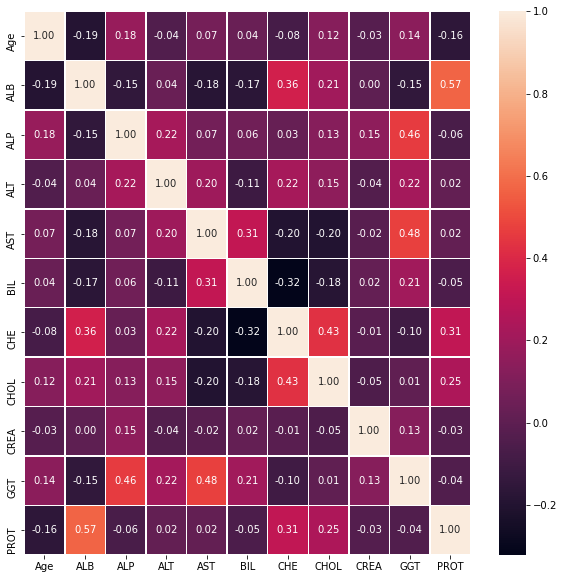

In [19]:
# view the degree of association between the feature and the target

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

where the second column Category is the label value, "0=blood donor", "0s=suspect donor", "1=hepatitis", " 2=fibrosis", and "3=cirrhosis". This figure shows that in addition to the patient's label, the highest correlation with the categorical label is the AST (glutamic aminotransferase) test value, followed by BIL (bilirubin) and GGT (glutamyl transpeptidase).

# Cross Tables and Data Visualisation

In [20]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [21]:
gender = pd.crosstab(index = df['Sex'],
                    columns = 'Count',
                    normalize = True)
gender

col_0,Count
Sex,
f,0.383701
m,0.616299


In [22]:
sex = pd.crosstab(index = df['Category'],
                 columns = df['Sex'],
                 margins = True,
                 normalize = 'index')
sex

Sex,f,m
Category,,
0=Blood Donor,0.397338,0.602662
0s=suspect Blood Donor,0.142857,0.857143
1=Hepatitis,0.200000,0.800000
2=Fibrosis,0.333333,0.666667
3=Cirrhosis,0.333333,0.666667
All,0.383701,0.616299


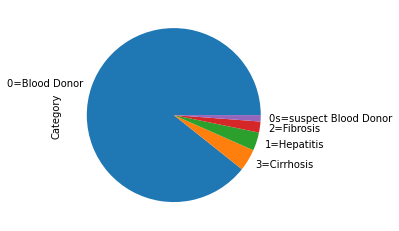

In [23]:
df['Category'].value_counts().plot.pie()
plt.show()

The pie chart shows that the majority of the data set were healthy individuals, with less records of suspected blood donors

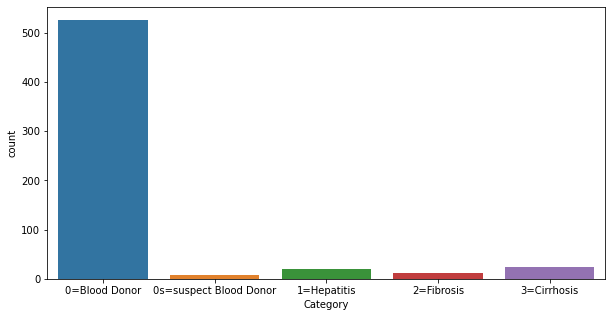

In [24]:
# Frequency distribution of blood category,,,, Bar graph
plt.figure(figsize=(10,5))
sex = sns.countplot(df['Category'])

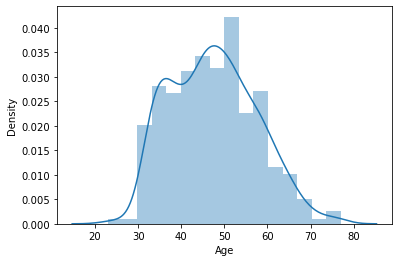

In [25]:
# Explore the relationship between age and disease
sns.distplot(df['Age'])
plt.show()

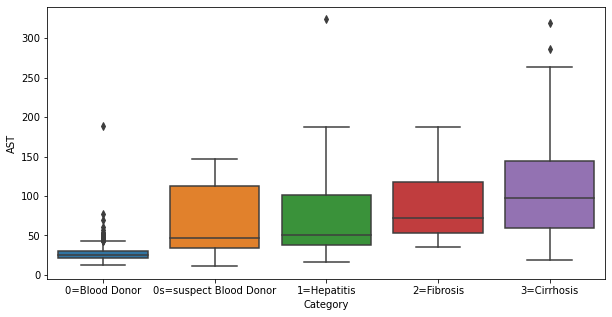

In [26]:
plt.figure(figsize=(10,5))
var  = 'AST'
data = pd.concat([df['Category'], df[var]], axis=1)
fig  = sns.boxplot(y=var, x="Category", data=data)

From the line and box plots it is very obvious to observe that the mean value of AST in healthy and suspected healthy individuals is smaller than the mean value of AST in diseased individuals (hepatitis, fibrosis, cirrhosis). This indicates that the higher the AST, the higher the probability of disease. Much higher levels of AST may indicate that the patient might have Cirrhosis.

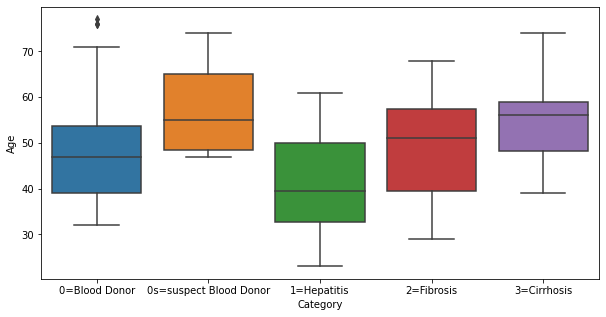

In [27]:
plt.figure(figsize=(10,5))
var  = 'Age'
data = pd.concat([df['Category'], df[var]], axis=1)
fig  = sns.boxplot(y=var, x="Category", data=data)


The distribution of age showed a normal distribution and there was no significant degree of association with the disease. The plot shows that only people around the age of 30 were recorded. 

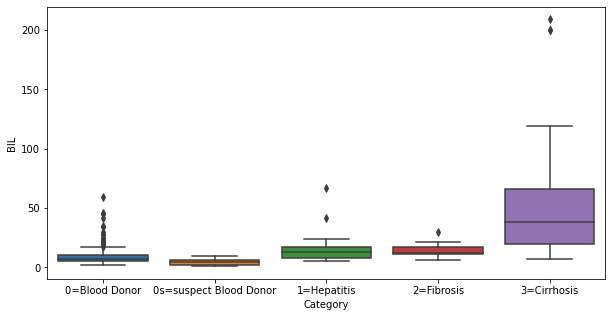

In [28]:
plt.figure(figsize=(10,5))
var  = 'BIL'
data = pd.concat([df['Category'], df[var]], axis=1)
fig  = sns.boxplot(y=var, x="Category", data=data)

Patients with cirrhosis have the highest mean bilirubin values. Cirrhosis patients have higher than usual levels of AST.

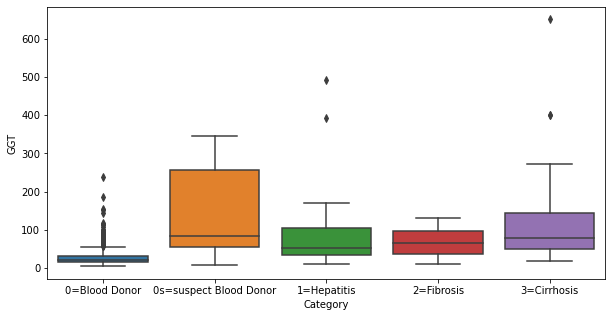

In [29]:
# Explore the relationship between glutamyl transpeptidase GGT and disease var  = 'GGT'
plt.figure(figsize=(10,5))
var = 'GGT'
data = pd.concat([df['Category'], df[var]], axis=1)
fig  = sns.boxplot(y=var, x="Category", data=data)

The pie chart of the view labels shows an increasing relationship except for the suspected, perhaps because there are too few suspected data?

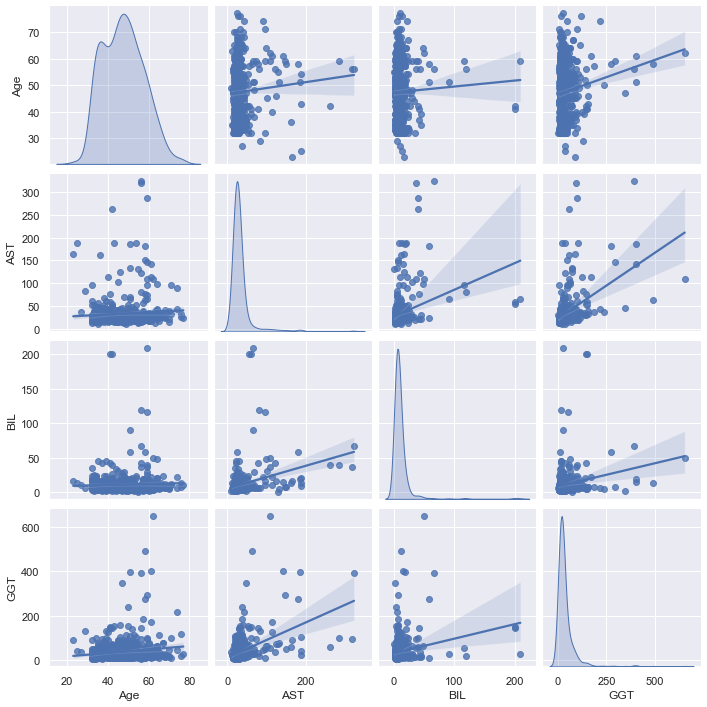

In [30]:
# Pairplot mainly shows the relationship between variables (linear or non linear, wether there is a more obvious correlation)

sns.set()
cols = ['Category','Age','Sex', 'AST', 'BIL', 'GGT']
sns.pairplot(df[cols], kind="reg",diag_kind="kde")
plt.show()

# Conclusion

1. The highest correlation with classification was found for AST (glutamate aminotransferase) test values, followed by BIL (bilirubin) and GGT (glutamyl transpeptidase).

2. transaminases, bilirubin, and glutamyl transpeptidase showed positive correlation with the probability of disease, and the higher the value, the more severe the disease.

3. age, sex, bilirubin, and cholesterol did not have a significant degree of association with the probability of disease.

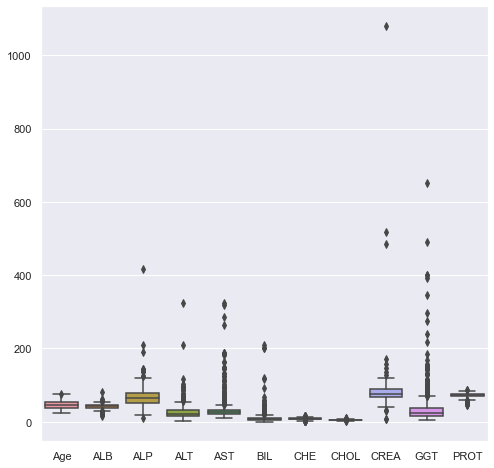

In [31]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df)
plt.show()

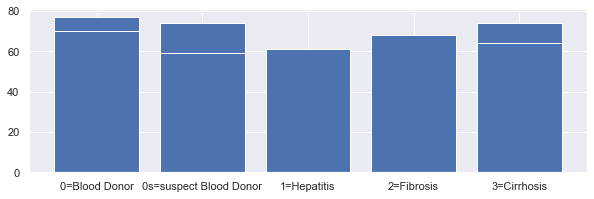

In [32]:
plt.figure(figsize=(10,3))
plt.bar(df['Category'],df['Age'])
plt.show()

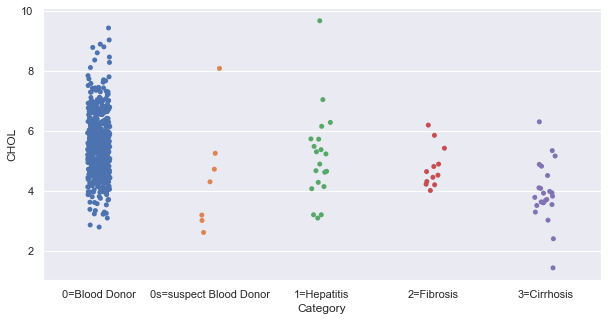

In [33]:
#showing how Cholesterol levels differ for each category
plt.figure(figsize=(10,5))
sns.stripplot(df['Category'],df['CHOL'])
plt.show()

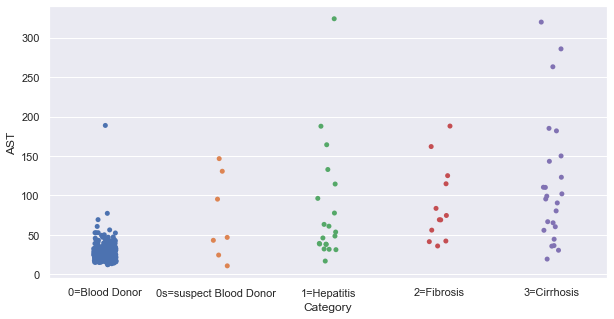

In [34]:
#showing how AST levels differs for different categories
plt.figure(figsize=(10,5))
sns.stripplot(df['Category'],df['AST'])
plt.show()

# Machine Learning Algorithms


In [35]:
new_df = pd.get_dummies(df, drop_first=True)

In [36]:
new_df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_m
1,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0,0,0,1
2,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0,0,0,1
3,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0,0,0,1
4,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0,0,0,1
5,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,58,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,0,0,0,1,0
610,59,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,0,0,0,1,0
611,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,0,0,1,0
612,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,0,0,1,0


In [37]:
cols_list=list(new_df.columns)
cols_list

['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT',
 'Category_0s=suspect Blood Donor',
 'Category_1=Hepatitis',
 'Category_2=Fibrosis',
 'Category_3=Cirrhosis',
 'Sex_m']

In [38]:
features=list(set(cols_list)-set(['Category_1=Hepatitis']))
features

['Category_3=Cirrhosis',
 'AST',
 'Category_2=Fibrosis',
 'ALP',
 'CHOL',
 'CREA',
 'BIL',
 'PROT',
 'Sex_m',
 'GGT',
 'Category_0s=suspect Blood Donor',
 'ALT',
 'CHE',
 'Age',
 'ALB']

In [39]:
X=new_df[features].values
X

array([[  0.  ,  22.1 ,   0.  , ...,   6.93,  32.  ,  38.5 ],
       [  0.  ,  24.7 ,   0.  , ...,  11.17,  32.  ,  38.5 ],
       [  0.  ,  52.6 ,   0.  , ...,   8.84,  32.  ,  46.9 ],
       ...,
       [  1.  , 110.3 ,   0.  , ...,   5.57,  62.  ,  32.  ],
       [  1.  ,  44.4 ,   0.  , ...,   1.54,  64.  ,  24.  ],
       [  1.  ,  99.  ,   0.  , ...,   1.66,  64.  ,  29.  ]])

In [40]:
y=new_df['Category_1=Hepatitis']
y

1      0
2      0
3      0
4      0
5      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Category_1=Hepatitis, Length: 589, dtype: uint8

In [41]:
train_x, test_x,train_y,test_y=train_test_split(X, y, test_size=0.3, random_state=0)

# Logistic Regression


In [42]:
logistic=LogisticRegression()        

In [43]:
start=time.time()
logistic.fit(train_x, train_y)
end=time.time()
print('Fitting time using LR is %f' %(float(end)-float(start)))
logistic.coef_

Fitting time using LR is 0.379903


array([[-4.90500459e-01,  1.55193697e-02, -1.71961641e+00,
        -1.63475314e-01, -9.62764366e-02, -4.19474988e-02,
         3.35530836e-02,  1.80041251e-02, -6.65472769e-01,
         4.18832415e-02, -9.91449858e-05, -5.40018307e-02,
         4.46766993e-01, -1.37365369e-01,  1.72293930e-01]])

In [44]:
LRprediction=logistic.predict(test_x)
LRprediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [45]:
def plot_heatmap(confusion_matrix, title):
       df_cm= pd.DataFrame(confusion_matrix, index=['Has Hepatitis', 'Doesnt have Hepatitis'])
       df_cm.columns=['Has Hepatitis', 'Doesnt have Hepatitis']

       ax=plt.axes()
       sns.heatmap(df_cm, annot=True, fmt='d', ax=ax)
       plt.show()
       return

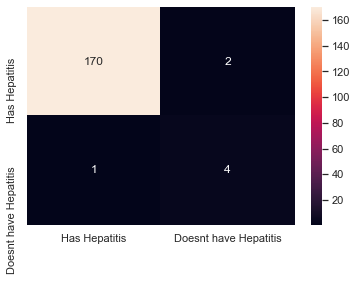

In [46]:
plot_heatmap(confusion_matrix(test_y, LRprediction), 'Logistic Regression')

The confusion matrix for Logistic Regression shows that 174 true predictions were made(170 True-Positives and 4 True Negatives) and 3 false predictions were made(2 False-Positives and 1 False-Negative). Thus the model worked fairly good.

In [47]:
print(classification_report(test_y,LRprediction, digits=3))

              precision    recall  f1-score   support

           0      0.994     0.988     0.991       172
           1      0.667     0.800     0.727         5

    accuracy                          0.983       177
   macro avg      0.830     0.894     0.859       177
weighted avg      0.985     0.983     0.984       177



In [48]:
print(accuracy_score(test_y,LRprediction))

0.9830508474576272


ROC CURVE FOR LOGISTIC REGRESSION BEFORE FEATURE SELECTION


In [49]:
from sklearn import metrics
from sklearn.metrics import roc_curve

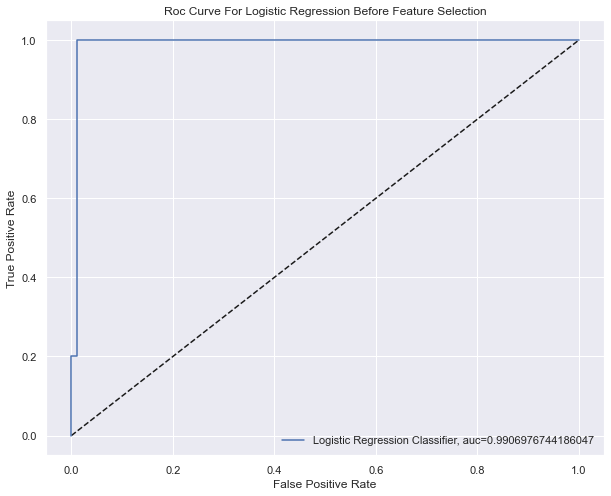

In [50]:
alg= LogisticRegression().fit(train_x,train_y)
y_pred=alg.predict(test_x)

y_pred_proba = alg.predict_proba(test_x)[::,1]
fpr, tpr, _  = metrics.roc_curve(test_y, y_pred_proba)
auc =  metrics.roc_auc_score(test_y,y_pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr, label='Logistic Regression Classifier, auc='+str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve For Logistic Regression Before Feature Selection')
plt.legend(frameon=False)
plt.show()

The ROC CURVE shows that Logistic Regression has a higher auc(Area Under Curve) very close to 1, thus is a very good model since the higher the AUC the better the model's ability to separate classes.

PRECISION-RECALL CURVE FOR LOGISTIC REGRESSION

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

LOGISTIC REGRESSION: f1-score=0.727 auc=0.658


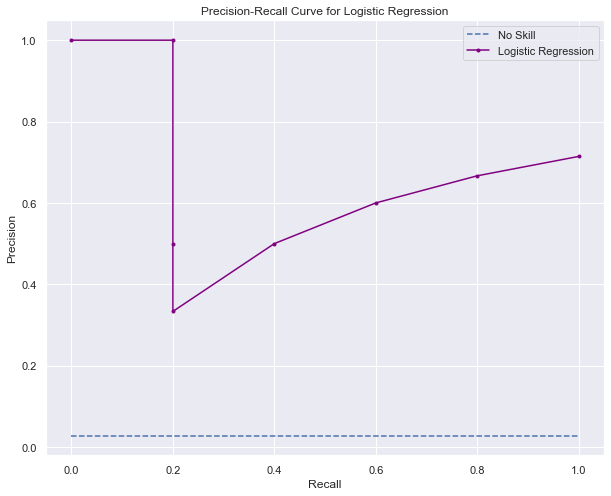

In [52]:
plt.figure(figsize=(10,8))
lr_precision, lr_recall, _ = precision_recall_curve(test_y, y_pred_proba)
lr_f1, lr_auc = f1_score(test_y,y_pred), auc(lr_recall, lr_precision)

print('LOGISTIC REGRESSION: f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_skill = len(test_y[test_y==1]) / len(test_y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression', color='purple')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend()
plt.show()

# Random Forest 

In [53]:
RF= RandomForestClassifier()


In [54]:
start=time.time()
RF.fit(train_x, train_y)
end=time.time()
print('Fitting time using RF is %f' %(float(end)-float(start)))


Fitting time using RF is 0.579242


In [55]:
RFprediction= RF.predict(test_x)
RFprediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

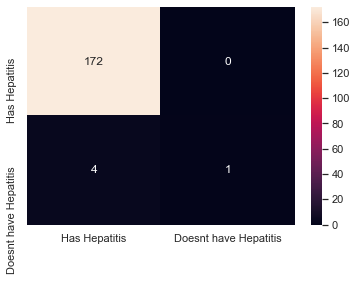

In [56]:
plot_heatmap(confusion_matrix(test_y, RFprediction), 'Random Forest classification')

The confusion matrix shows that 173 true predictions were made(172 True-Positives and 1 True-Negative) and 4 false predictions(no False-Positives and 4 False-Negatives)were made. Thus the model worked fairly well but with lower accuracy than Logistic Regression 

In [57]:
print(classification_report(test_y,RFprediction, digits=3))

              precision    recall  f1-score   support

           0      0.977     1.000     0.989       172
           1      1.000     0.200     0.333         5

    accuracy                          0.977       177
   macro avg      0.989     0.600     0.661       177
weighted avg      0.978     0.977     0.970       177



In [58]:
print(accuracy_score(test_y,RFprediction))

0.9774011299435028


ROC CURVE FOR RANDOM FOREST BEFORE FEATURE SELECTION

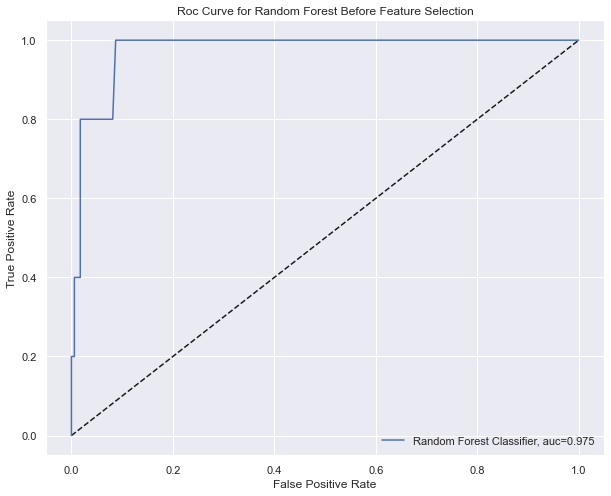

In [59]:
alg1= RandomForestClassifier().fit(train_x,train_y)
y_pred1=alg1.predict(test_x)

y_pred_proba1 = alg1.predict_proba(test_x)[::,1]
fpr1, tpr1, _  = metrics.roc_curve(test_y, y_pred_proba1)
auc1 =  metrics.roc_auc_score(test_y,y_pred_proba1)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1,tpr1, label='Random Forest Classifier, auc='+str(auc1))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve for Random Forest Before Feature Selection')
plt.legend(frameon=False)
plt.show()

The ROC CURVE shows that Random Forest has a slightly higher auc(Area Under Curve) close to 1, thus is a good model.

PRECISION-RECALL CURVE FOR RANDOM FOREST CLASSIFIER

RANDOM FOREST: f1-score=0.333 auc=0.561


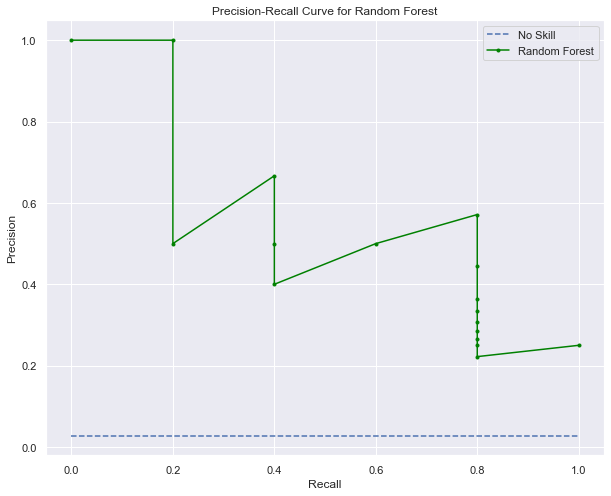

In [60]:
plt.figure(figsize=(10,8))
lr_precision1, lr_recall1, _ = precision_recall_curve(test_y, y_pred_proba1)
lr_f11, lr_auc1 = f1_score(test_y,y_pred1), auc(lr_recall1, lr_precision1)

print('RANDOM FOREST: f1-score=%.3f auc=%.3f' % (lr_f11, lr_auc1))

no_skill = len(test_y[test_y==1]) / len(test_y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall1, lr_precision1, marker='.', label='Random Forest', color='green')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend()
plt.show()

# Gradient Boosting Machines

In [61]:
GBM= GradientBoostingClassifier()

In [62]:
start=time.time()
GBM.fit(train_x, train_y)
end=time.time()
print('Fitting time using GBM is %f' %(float(end)-float(start)))


Fitting time using GBM is 0.282272


In [63]:
GBMprediction=GBM.predict(test_x)
GBMprediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

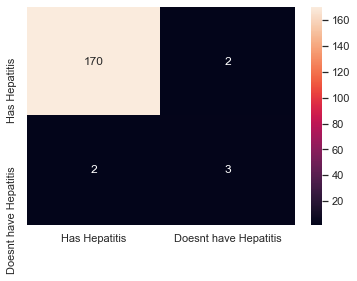

In [64]:
plot_heatmap(confusion_matrix(test_y, GBMprediction), 'Gradient Boosting Machines classification')

The confusion matrix shows that 173 true predictions were made(170 True-Positives and 3 True-Negative) and 4 false predictions(2 False-Positives and 2 False-Negatives) were made. Thus the model worked fairly well but with lower accuracy than Logistic Regression and the same accuracy as Random Forest 

In [65]:
print(classification_report(test_y,GBMprediction, digits=3))

              precision    recall  f1-score   support

           0      0.988     0.988     0.988       172
           1      0.600     0.600     0.600         5

    accuracy                          0.977       177
   macro avg      0.794     0.794     0.794       177
weighted avg      0.977     0.977     0.977       177



In [66]:
print(accuracy_score(test_y,GBMprediction))

0.9774011299435028


ROC CURVE FOR GRADIENT BOOSTING MACHINES BEFORE FEATURE SELECTION

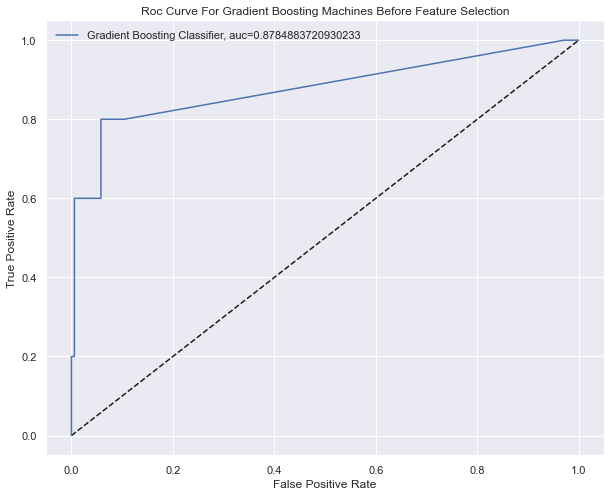

In [67]:
alg2= GradientBoostingClassifier().fit(train_x,train_y)
y_pred2=alg2.predict(test_x)

y_pred_proba2 = alg2.predict_proba(test_x)[::,1]
fpr2, tpr2, _  = metrics.roc_curve(test_y, y_pred_proba2)
auc2 =  metrics.roc_auc_score(test_y,y_pred_proba2)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr2,tpr2, label='Gradient Boosting Classifier, auc='+str(auc2))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve For Gradient Boosting Machines Before Feature Selection')
plt.legend(frameon=False)
plt.show()

The ROC CURVE shows that Gradient Boosting Machines has a slightly high auc(Area Under Curve) a bit close to 1, thus is a better model.

PRECISION-RECALL CURVE FOR GRADIENT BOOSTING MACHINES

GBM: f1-score=0.600 auc=0.531


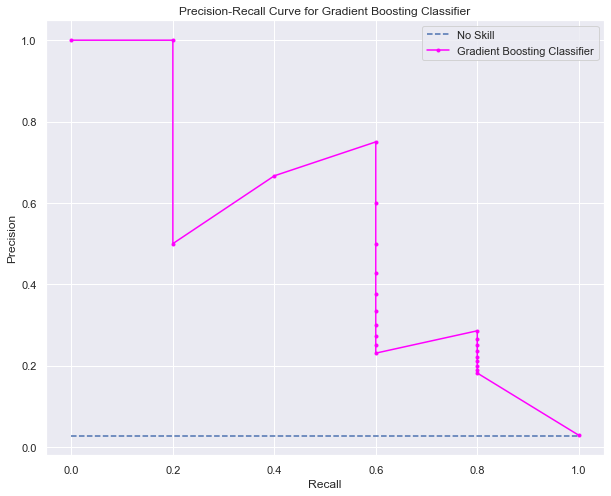

In [68]:
plt.figure(figsize=(10,8))
lr_precision2, lr_recall2, _ = precision_recall_curve(test_y, y_pred_proba2)
lr_f12, lr_auc2 = f1_score(test_y,y_pred2), auc(lr_recall2, lr_precision2)

print('GBM: f1-score=%.3f auc=%.3f' % (lr_f12, lr_auc2))

no_skill = len(test_y[test_y==1]) / len(test_y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall2, lr_precision2, marker='.', label='Gradient Boosting Classifier', color='magenta')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting Classifier')
plt.legend()
plt.show()

# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
DT= DecisionTreeClassifier()

In [71]:
start= time.time()
DT.fit(train_x, train_y)
end=time.time()
print('The fitting time for the DT classifier is %f' %(float(end)-float(start)))

The fitting time for the DT classifier is 0.008000


In [72]:
DTprediction=DT.predict(test_x)
DTprediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

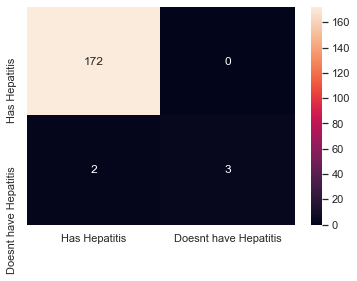

In [73]:
plot_heatmap(confusion_matrix(test_y, DTprediction), 'Decision Tree Prediction ')

The confusion matrix shows that 175 true predictions were made(172 True-Positives and 3 True-Negative) and 2 false predictions(no False-Positives and 2 False-Negatives) were made. Thus the model worked very well in terms of accuracy: it has a slightly higher accuracy than Logistic Regression and the rest of the other tested algorithms.

In [74]:
print(classification_report(test_y, DTprediction, digits=3))

              precision    recall  f1-score   support

           0      0.989     1.000     0.994       172
           1      1.000     0.600     0.750         5

    accuracy                          0.989       177
   macro avg      0.994     0.800     0.872       177
weighted avg      0.989     0.989     0.987       177



In [75]:
print(accuracy_score(test_y, DTprediction))

0.9887005649717514


ROC CURVE FOR DECISION TREE BEFORE FEATURE SELECTION

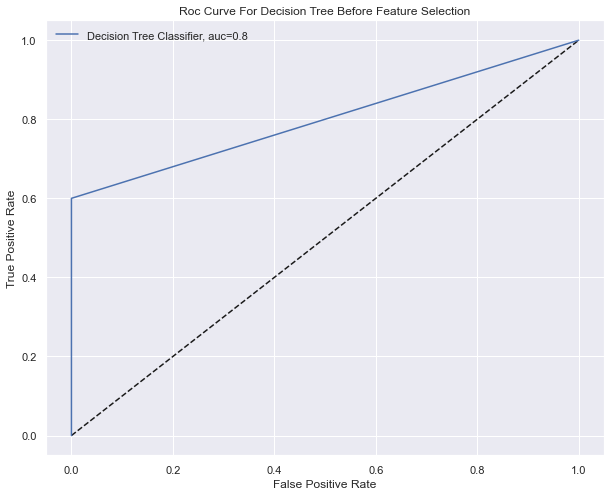

In [76]:
alg3= DecisionTreeClassifier().fit(train_x,train_y)
y_pred3=alg3.predict(test_x)

y_pred_proba3 = alg3.predict_proba(test_x)[::,1]
fpr3, tpr3, _  = metrics.roc_curve(test_y, y_pred_proba3)
auc3 =  metrics.roc_auc_score(test_y,y_pred_proba3)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr3,tpr3, label='Decision Tree Classifier, auc='+str(auc3))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve For Decision Tree Before Feature Selection')
plt.legend(frameon=False)
plt.show()

The ROC CURVE shows that Decision Tree has a slightly high auc(Area Under Curve) a bit close to 1, thus is a better model.

PRECISION-RECALL CURVE FOR DECISION TREE

DECISION TREE: f1-score=0.750 auc=0.806


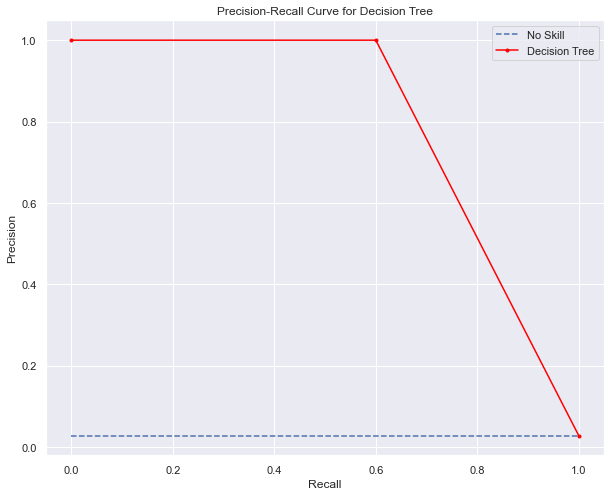

In [77]:
plt.figure(figsize=(10,8))
lr_precision3, lr_recall3, _ = precision_recall_curve(test_y, y_pred_proba3)
lr_f13, lr_auc3 = f1_score(test_y,y_pred3), auc(lr_recall3, lr_precision3)

print('DECISION TREE: f1-score=%.3f auc=%.3f' % (lr_f13, lr_auc3))

no_skill = len(test_y[test_y==1]) / len(test_y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall3, lr_precision3, marker='.', label='Decision Tree', color='red')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend()
plt.show()

# Gaussian Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
GNB= GaussianNB()

In [80]:
start= time.time()
GNB.fit(train_x, train_y)
end=time.time()
print('The fitting time for the GNB classifier is %f' %(float(end)-float(start)))

The fitting time for the GNB classifier is 0.000000


In [81]:
GNBprediction=GNB.predict(test_x)
GNBprediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1], dtype=uint8)

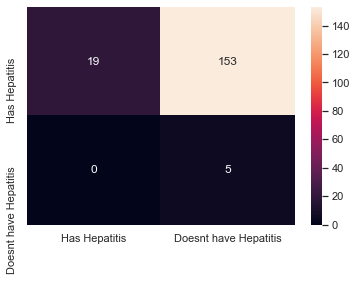

In [82]:
plot_heatmap(confusion_matrix(test_y, GNBprediction), 'Gaussin Naive Bayes')

The Gaussian Naive Bayes algorithm proves to be the worst algorithm with only 24 true predictions(19 True-Positives and 5 True-Negatives) and 153 false predictions all False-Positives. The algorithm has an extremely low accuracy score.

In [83]:
print(classification_report(test_y, GNBprediction, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.110     0.199       172
           1      0.032     1.000     0.061         5

    accuracy                          0.136       177
   macro avg      0.516     0.555     0.130       177
weighted avg      0.973     0.136     0.195       177



In [84]:
print(accuracy_score(test_y, GNBprediction))

0.13559322033898305


ROC CURVE FOR GAUSSIAN NAIVE BAYES BEFORE FEATURE SELECTION

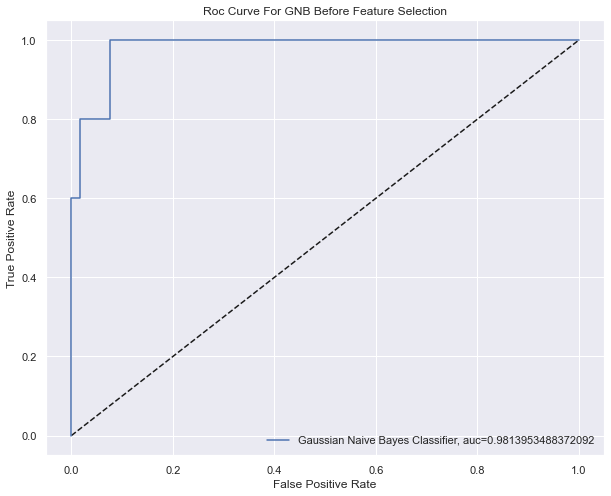

In [85]:
alg4= GaussianNB().fit(train_x,train_y)
y_pred4=alg4.predict(test_x)

y_pred_proba4 = alg4.predict_proba(test_x)[::,1]
fpr4, tpr4, _  = metrics.roc_curve(test_y, y_pred_proba4)
auc4 =  metrics.roc_auc_score(test_y,y_pred_proba4)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr4,tpr4, label='Gaussian Naive Bayes Classifier, auc='+str(auc4))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve For GNB Before Feature Selection')
plt.legend(frameon=False)
plt.show()

The ROC CURVE shows that Gaussian Naive Bayes has a slightly high auc(Area Under Curve) a bit close to 1, thus is a better model. Though it has a very low accuracy score.

PRECISION-RECALL GRAPH FOR GAUSSIAN-NB

GAUSSIAN-NB: f1-score=0.061 auc=0.758


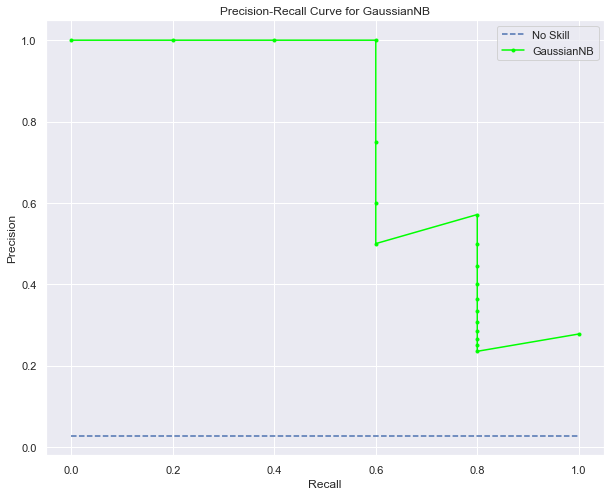

In [86]:
plt.figure(figsize=(10,8))
lr_precision4, lr_recall4, _ = precision_recall_curve(test_y, y_pred_proba4)
lr_f14, lr_auc4 = f1_score(test_y,y_pred4), auc(lr_recall4, lr_precision4)

print('GAUSSIAN-NB: f1-score=%.3f auc=%.3f' % (lr_f14, lr_auc4))

no_skill = len(test_y[test_y==1]) / len(test_y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall4, lr_precision4, marker='.', label='GaussianNB', color='lime')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for GaussianNB')
plt.legend()
plt.show()

# Roc Curve For All Used Algorithms

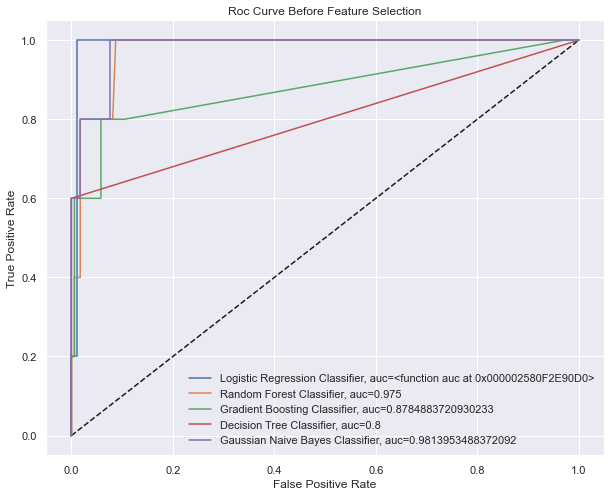

In [87]:
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr, label='Logistic Regression Classifier, auc='+str(auc))
plt.plot(fpr1,tpr1, label='Random Forest Classifier, auc='+str(auc1))
plt.plot(fpr2,tpr2, label='Gradient Boosting Classifier, auc='+str(auc2))
plt.plot(fpr3,tpr3, label='Decision Tree Classifier, auc='+str(auc3))
plt.plot(fpr4,tpr4, label='Gaussian Naive Bayes Classifier, auc='+str(auc4))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve Before Feature Selection')
plt.legend(frameon=False)
plt.show()

CONCLUSION---
From the results above, most of the methods used in the analysis can predict with around the same level of accuracy and performance, greater than 90%. The Logistic Regression and Decision Tree algorithms perform best in terms of accuracy score.
Logistic Regression, Gaussian Naive Bayes and Random Forest perform best in terms of AUC. However, the analysis is with respect to HepatitisC.

# Feature Selection By Filtering

In [88]:
new_df

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_m
1,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0,0,0,1
2,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0,0,0,1
3,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0,0,0,1
4,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0,0,0,1
5,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,58,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,0,0,0,1,0
610,59,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,0,0,0,1,0
611,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,0,0,1,0
612,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,0,0,1,0


In [89]:
new_df.loc[new_df['Category_1=Hepatitis']==1]


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_m
543,23,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1,0,1,0,0,1
544,25,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5,0,1,0,0,1
545,27,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5,0,1,0,0,1
548,32,45.0,34.6,44.3,96.2,16.0,10.11,6.28,81.2,48.1,82.1,0,1,0,0,1
549,32,41.0,34.4,12.1,60.9,6.0,13.80,5.48,45.4,33.1,71.1,0,1,0,0,1
550,34,46.0,36.7,7.4,31.6,9.0,9.71,5.37,82.3,34.4,71.6,0,1,0,0,1
551,35,47.0,37.9,13.3,48.4,8.0,10.30,4.14,69.2,68.2,76.0,0,1,0,0,1
552,36,44.0,32.9,9.4,32.0,14.0,11.42,5.73,68.6,40.6,70.9,0,1,0,0,1
553,38,41.0,20.6,15.2,53.5,24.0,10.23,4.89,81.8,57.9,71.1,0,1,0,0,1
554,41,42.0,39.6,26.5,77.6,42.0,9.67,9.67,57.7,143.4,75.8,0,1,0,0,1


In [90]:
drop_cols=['Age', 'Category_0s=suspect Blood Donor','Category_2=Fibrosis','Category_3=Cirrhosis','ALP', 'BIL', 'ALB', 'CHE']

In [91]:
sel_df=new_df.copy()

In [92]:
sel_df.drop(columns=drop_cols, inplace=True)
sel_df

,ALT,AST,CHOL,CREA,GGT,PROT,Category_1=Hepatitis,Sex_m
1,7.7,22.1,3.23,106.0,12.1,69.0,0,1
2,18.0,24.7,4.80,74.0,15.6,76.5,0,1
3,36.2,52.6,5.20,86.0,33.2,79.3,0,1
4,30.6,22.6,4.74,80.0,33.8,75.7,0,1
5,32.6,24.8,4.32,76.0,29.9,68.7,0,1
...,...,...,...,...,...,...,...,...
609,15.0,150.0,3.98,56.0,49.7,80.6,0,0
610,19.6,285.8,4.51,136.1,101.1,70.5,0,0
611,5.9,110.3,6.30,55.7,650.9,68.5,0,0
612,2.9,44.4,3.02,63.0,35.9,71.3,0,0


In [93]:
sel_df.corr()

,ALT,AST,CHOL,CREA,GGT,PROT,Category_1=Hepatitis,Sex_m
ALT,1.000000,0.198658,0.149997,-0.036106,0.219707,0.016786,-0.053427,0.177107
AST,0.198658,1.000000,-0.201213,-0.017948,0.477774,0.017404,0.273479,0.129883
CHOL,0.149997,-0.201213,1.000000,-0.051464,0.008823,0.245050,-0.041941,-0.030447
CREA,-0.036106,-0.017948,-0.051464,1.000000,0.125353,-0.030111,-0.030217,0.158068
GGT,0.219707,0.477774,0.008823,0.125353,1.000000,-0.037127,0.223575,0.128142
PROT,0.016786,0.017404,0.245050,-0.030111,-0.037127,1.000000,0.087696,0.043296
Category_1=Hepatitis,-0.053427,0.273479,-0.041941,-0.030217,0.223575,0.087696,1.000000,0.070824
Sex_m,0.177107,0.129883,-0.030447,0.158068,0.128142,0.043296,0.070824,1.000000


In [94]:
sel_cols_list=list(sel_df.columns)
sel_features=list(set(sel_cols_list)-set(['Category_1=Hepatitis']))



In [95]:
X1=sel_df[sel_features].values
X1

array([[ 22.1,  12.1,   7.7, ..., 106. ,  69. ,   1. ],
       [ 24.7,  15.6,  18. , ...,  74. ,  76.5,   1. ],
       [ 52.6,  33.2,  36.2, ...,  86. ,  79.3,   1. ],
       ...,
       [110.3, 650.9,   5.9, ...,  55.7,  68.5,   0. ],
       [ 44.4,  35.9,   2.9, ...,  63. ,  71.3,   0. ],
       [ 99. ,  64.2,   3.5, ...,  66.7,  82. ,   0. ]])

In [96]:
y1=sel_df['Category_1=Hepatitis']
y1

1      0
2      0
3      0
4      0
5      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Category_1=Hepatitis, Length: 589, dtype: uint8

In [97]:
train_x1, test_x1,train_y1,test_y1=train_test_split(X1, y1, test_size=0.3, random_state=0)

# Roc Curve After Feature Selection

In [98]:
lg= LogisticRegression().fit(train_x1,train_y1)
sel_y_pred=lg.predict(test_x1)
lg1= RandomForestClassifier().fit(train_x1,train_y1)
sel_y_pred1=lg1.predict(test_x1)
lg2= GradientBoostingClassifier().fit(train_x1,train_y1)
sel_y_pred2=lg2.predict(test_x1)
lg3= DecisionTreeClassifier().fit(train_x1,train_y1)
sel_y_pred3=lg3.predict(test_x1)
lg4= GaussianNB().fit(train_x1,train_y1)
sel_y_pred4=lg4.predict(test_x1)


In [99]:
y_pred_proba5 = lg.predict_proba(test_x1)[::,1]
fpr5, tpr5, _  = metrics.roc_curve(test_y1, y_pred_proba5)
auc5 =  metrics.roc_auc_score(test_y1,y_pred_proba5)

y_pred_proba6 = lg1.predict_proba(test_x1)[::,1]
fpr6, tpr6, _  = metrics.roc_curve(test_y1, y_pred_proba6)
auc6 =  metrics.roc_auc_score(test_y1,y_pred_proba6)

y_pred_proba7 = lg2.predict_proba(test_x1)[::,1]
fpr7, tpr7, _  = metrics.roc_curve(test_y1, y_pred_proba7)
auc7 =  metrics.roc_auc_score(test_y1,y_pred_proba7)

y_pred_proba8 = lg3.predict_proba(test_x1)[::,1]
fpr8, tpr8, _  = metrics.roc_curve(test_y1, y_pred_proba8)
auc8 =  metrics.roc_auc_score(test_y1,y_pred_proba8)

y_pred_proba9 = lg4.predict_proba(test_x1)[::,1]
fpr9, tpr9, _  = metrics.roc_curve(test_y1, y_pred_proba9)
auc9 =  metrics.roc_auc_score(test_y1,y_pred_proba9)

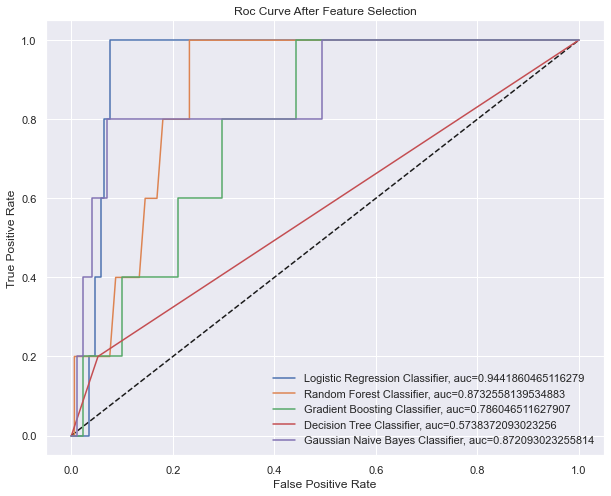

In [100]:
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr5,tpr5, label='Logistic Regression Classifier, auc='+str(auc5))
plt.plot(fpr6,tpr6, label='Random Forest Classifier, auc='+str(auc6))
plt.plot(fpr7,tpr7, label='Gradient Boosting Classifier, auc='+str(auc7))
plt.plot(fpr8,tpr8, label='Decision Tree Classifier, auc='+str(auc8))
plt.plot(fpr9,tpr9, label='Gaussian Naive Bayes Classifier, auc='+str(auc9))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve After Feature Selection')
plt.legend(frameon=False)
plt.show()

The ROC CURVE after feature selection shows a significant drop in AUC for all the Machine Learning Algorithms used thus for this dataset feature selection may not be necessary and all given variables may be relevant in the predictions. Logistic Regression which had a 99% probability of distinguishing between patients with the disease and those without dropped to 94%.